# The Problem: MNIST digit classification

We’re going to tackle a classic machine learning problem: MNIST handwritten digit classification. It’s simple: given an image, classify it as a digit.

# Dataset
Taken from the Keras library in which there is a method called as datasets we can use for predtiction purpose

In [68]:
#What is Keras?
## Keras is a simple-to-use but powerful deep learning library for Python. 
#In this post, we’ll see how easy it is to build a feedforward neural network
# and train it to solve a real problem with Keras.


from keras.datasets import mnist

# Train and Test split and Loading the Dataset 

In [69]:
(train_image,train_labels),(test_image,test_labels)=mnist.load_data()

# Data  Preparing 

we need to flatten each image before we can pass it into our neural network. We’ll also normalize the pixel values from [0, 255] to [-0.5, 0.5] to make our network easier to train.

In [70]:
print(len(train_image))
print(len(train_labels))


60000
60000


In [71]:
print(len(test_image))
print(len(test_labels))

10000
10000


### look out the Dimension of the First Image and the shape of the train_image  

Each image in the MNIST dataset is 28x28 and contains a centered, grayscale digit. We’ll flatten each 28x28 into a 784 dimensional vector, which we’ll use as input to our neural network. Our output will be one of 10 possible classes: one for each digit.

In [72]:
print(train_image[0])
print(train_image[0].shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [73]:
#TO Look the image we have to import the matplot 
import matplotlib.pyplot as plt

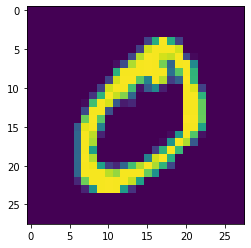

In [74]:
plt.imshow(train_image[1],cmap=None)

### We can see more images using the for loop

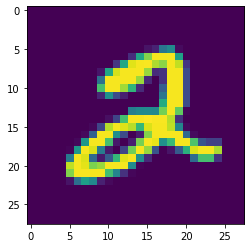

Label= 2


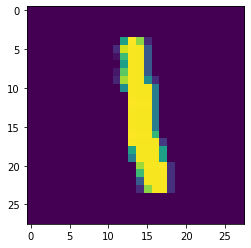

Label= 1


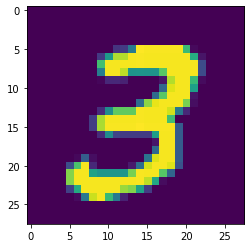

Label= 3


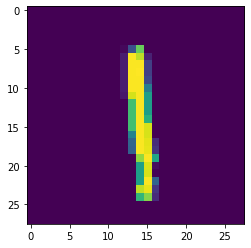

Label= 1


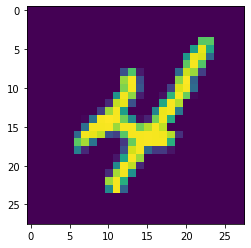

Label= 4


In [75]:
for i in range(5,10):
  plt.imshow(train_image[i],cmap=None)
  plt.show()
  print('Label= '+str(train_labels[i]))

In [76]:
#flatten image cause nn wont take 3d so 
train_image=train_image.reshape((60000,28*28)).astype('float32')/255
test_image=test_image.reshape((10000,28*28)).astype('float32')/255

## Flatten image cause the Feedforward neural network  wont take 3dimensional value so we have do the flattening 


In [77]:
print(len(train_image))
#print(len(train_labels))

print(train_image.shape)

60000
(60000, 784)


In [78]:
#0-1 value of each images
print(train_image[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

# Building the Model

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### The Sequential constructor takes an array of Keras Layers. Since we’re just building a standard feedforward network, we only need the Dense layer, which is your regular fully-connected (dense) network layer.

Let’s throw in 3 Dense layers:

##### We’ll be using the simpler Sequential model, since our network is indeed a linear stack of layers.

In [80]:

model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

### complie the model

####  the compilation step:

    The optimizer we will use the default: the Adam gradient-based optimizer. Keras has many other optimizers too. 
    The loss function. Since we’re using a Softmax output layer, we’ll use the Cross-Entropy loss.
     Keras distinguishes between binary_crossentropy (2 classes) and categorical_crossentropy (>2 classes).
    A list of metrics. Since this is a classification problem, we’ll just have Keras report on the accuracy metric.


In [81]:
#complie the model
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Training the Model

    The training data (images and labels), commonly known as X and Y, respectively.
    The number of epochs (iterations over the entire dataset) to train for.
    The batch size (number of samples per gradient update) to use when training.


In [82]:
# train
model.fit(
  train_image,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4782 - accuracy: 0.8628
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1326 - accuracy: 0.9603
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0930 - accuracy: 0.9715
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0695 - accuracy: 0.9779
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0577 - accuracy: 0.9813


# Testing the model

In [83]:
#test 
model.evaluate(
  test_image,
  to_categorical(test_labels)
)


313/313 [==============================] - 0s 1ms/step - loss: 0.0831 - accuracy: 0.9748


[0.08313364535570145, 0.9747999906539917]

#### evaluate() returns an array containing the test loss followed by any metrics we specified. Thus, our model achieves a 41.52 test loss and 85.9% test accuracy! Not bad for your first neural network.

# Predicting the model

#### Using the trained model to make predictions easy we pass an array of inputs to predict() and it returns an array of outputs.the output of our network is 10 probabilities (because of softmax) so we’ll use np.argmax() to turn those into actual digits.

In [84]:
# Predict on the first 5 test images.
predictions = model.predict(test_image[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]
[7 2 1 0 4]


In [86]:
# Predict on the first 5 test images.
predictions = model.predict(test_image[41:47])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[41:47]) # [7, 2, 1, 0, 4]

[7 4 2 3 5 1]
[7 4 2 3 5 1]


In [87]:
# Predict on the first 5 test images.
predictions = model.predict(test_image[11:21])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[11:21]) # [7, 2, 1, 0, 4]

[6 9 0 1 5 9 7 3 4 9]
[6 9 0 1 5 9 7 3 4 9]
